In [1]:
import numpy as np
import statsmodels.api as sm
import pylab as pl
import pandas as pd
import os
import seaborn
import datetime
from IPython.display import Image
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Fare = np.load("MTA_Fare.npy")
Fare = np.where(Fare == -1, np.nan, Fare)
Fare.shape

(600, 23, 194)

In [ ]:
#np.place(Fare, Fare == -1, [0])

## 1

#### * Since there are only 194 weeks' data, but 196 weeks during the time period, I assume the first week start from the nearst Sunday ( 1st day of a week) of 2010-05-21.

In [3]:
day = ( datetime.date(2014,2,21) - datetime.date(2010,5,21) + datetime.timedelta(days=1)).days
print "The Number of Days: {} days\nThe Number of Weeks: {:.1f} weeks".format(day, day/7.0)

startDate = datetime.date(2010, 5, 21)
print startDate.weekday()
startDate = datetime.date(2010, 5, 24)
print startDate.weekday()

The Number of Days: 1373 days
The Number of Weeks: 196.1 weeks
4
0


#### I select 2010-5-24 as start date, because it's Sunday, the first day of a week.

#### * The first week starts from 2010-05-24.

In [4]:
#np.place(Fare, Fare==-1, [0])
Rides = [np.nansum(Fare[:,:,i]) for i in xrange(Fare.shape[2])]
RidesPerWeek = pd.DataFrame({'week': range(Fare.shape[2]), 'rides': Rides})

RidesPerWeek['weekStart']= [startDate + datetime.timedelta(days = 7 * i) for i in xrange(Fare.shape[2])]
RidesPerWeek['weekEnd']= [startDate + datetime.timedelta(days = 7 * i + 6) for i in xrange(Fare.shape[2])]
#pd.date_range('05/21/2010', periods=194, freq='w')
RidesPerWeek.head()

rides  week   weekStart     weekEnd
0  26720267.0     0  2010-05-24  2010-05-30
1  29265971.0     1  2010-05-31  2010-06-06
2  29601189.0     2  2010-06-07  2010-06-13
3  29387592.0     3  2010-06-14  2010-06-20
4  29185768.0     4  2010-06-21  2010-06-27

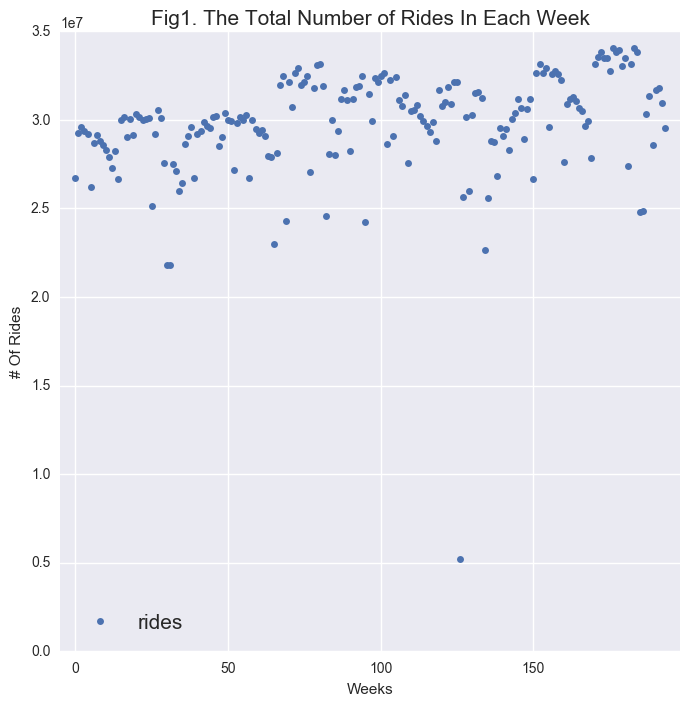

In [5]:
ax = RidesPerWeek.plot("week", "rides", style='o', ms=5, figsize=(8,8))
ax.set_xlim(-5, pl.xlim()[1]+5)
ax.set_ylim(0, pl.ylim()[1])
ax.legend(loc='lower left', fontsize=15)
ax.set_xlabel("Weeks")
ax.set_ylabel("# Of Rides")
ax.set_title("Fig1. The Total Number of Rides In Each Week", fontsize=15)

### Fig1 shows the number of weekly rides. Obviously, there's a unique point which is much lower than others.

In [6]:
ridesMean = np.nanmean(RidesPerWeek.rides)
ridesSTD = np.nanstd(RidesPerWeek.rides)
interval = [ridesMean-3*ridesSTD, ridesMean+3*ridesSTD]
print 'Rides:\nmean= {:.2f}\nstd= {:.2f}\n3-sigma interval= {}'.format(ridesMean, ridesSTD, interval)

Rides:
mean= 29781349.87
std= 2983960.42
3-sigma interval= [20829468.606031362, 38733231.136236683]


In [7]:
if interval[1] > RidesPerWeek.rides.max():
    print "Since the upper limit exceeds the maximum value of RiderPerWeek.rides,\n\
    we do need to consider lower limit only"

Since the upper limit exceeds the maximum value of RiderPerWeek.rides,
    we do need to consider lower limit only


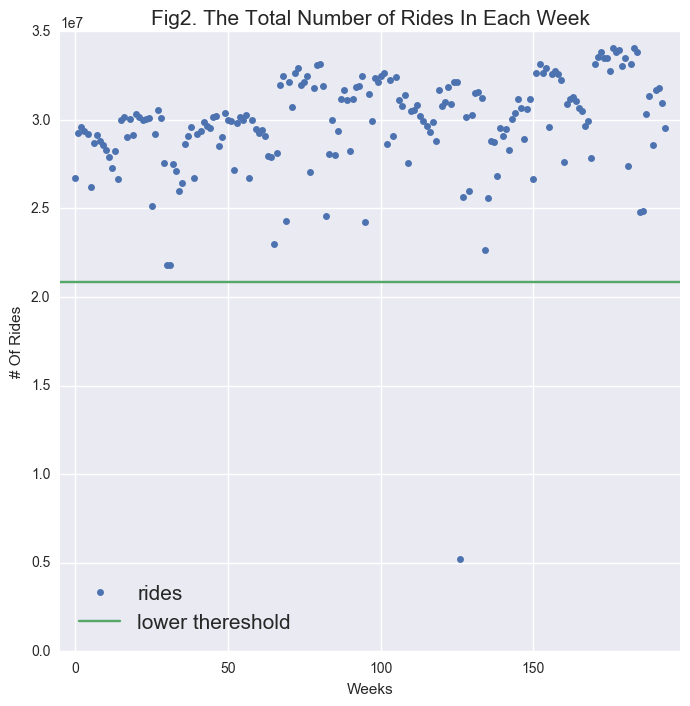

In [8]:
ax = RidesPerWeek.plot("week", "rides", style='o', ms=5, figsize=(8,8))
ax.set_xlim(-5, pl.xlim()[1]+5)
ax.set_ylim(0, pl.ylim()[1])
ax.set_xlabel("Weeks")
ax.set_ylabel("# Of Rides")
ax.set_title("Fig2. The Total Number of Rides In Each Week", fontsize=15)

ax.plot([-5, pl.xlim()[1]+5], [interval[0], interval[0]], label='lower thereshold')

ax.legend(loc='lower left', fontsize=15)

### Fig2 shows the number of weekly rides. 
### Also it shows a line which representes the values of [mean-3*sigma]. 
### Based on this line, it's clear to see the number of rides in one week (between 100 and 150) is much lower than others.


In [9]:
RidesPerWeek[RidesPerWeek.rides < interval[0]]

rides  week   weekStart     weekEnd
126  5218686.0   126  2012-10-22  2012-10-28

### What happened between 2012-10-22 and 2012-10-28?
### Hurricane Sandy hits New York City which made MTA System Shutdown on 2012-10-28.

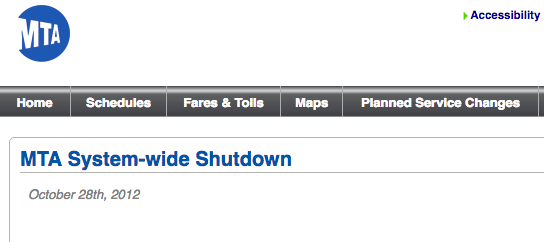

In [10]:
Image(filename = "MTA2.png")

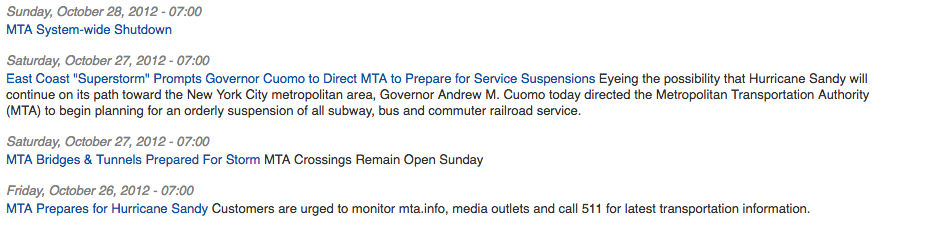

In [11]:
Image(filename = "MTA1.png")

"All public transportation was suspended — and officials said city buses and subways would likely not be running until Wednesday.<br/>
Even if flooding is limited, it would still take eight to 12 hours to get the nation’s largest system up and running.<br/>
And if the stations and tunnels are deluged, the MTA estimates it could take anywhere between 14 hours and four days just to pump out all the water."<br/>
--- [nydailynews](http://www.nydailynews.com/new-york/hurricane-sandy-hits-new-york-city-2012-article-1.2416531)

<br/><br/><br/>

## 2

### Here I delete the week when Sandy hit NYC (row_index = 126), which will influence the observation of trends.

In [12]:
Ridership = np.nansum(Fare[:,:,:], axis=0) / Fare.shape[0] 
Ridership = pd.DataFrame(Ridership.T)
Ridership = Ridership[Ridership.index != 126]
Ridership.head()

0           1          2           3           4            5   \
0  19157.691667  884.206667  79.668333  310.918333   78.013333  6162.405000   
1  20878.098333  972.555000  85.810000  332.048333  107.255000  6636.346667   
2  21277.711667  976.990000  86.060000  332.780000   94.990000  6721.716667   
3  21089.458333  937.670000  86.771667  327.315000   62.381667  6721.255000   
4  21349.490000  914.763333  85.255000  324.805000   58.683333  6542.410000   

             6          7           8            9  ...           13  \
0  14253.228333  16.771667  555.328333   853.386667 ...   205.223333   
1  15810.656667  19.745000  471.258333   963.371667 ...   253.246667   
2  15794.230000  20.461667  503.380000  1025.895000 ...   252.563333   
3  15750.135000  18.701667  509.188333  1010.450000 ...   245.156667   
4  15490.003333  17.525000  559.633333   939.076667 ...   229.813333   

            14          15         16        17          18         19  \
0  1316.850000   99.681667  47.035000  0.000000  207.821667  35.100000   
1  1513.446667  115.348333  53.888333  0.000000  202.855000  36.116667   
2  1523.540000  115.956667  54.363333  0.000000  203.635000  35.721667   
3  1504.248333  113.498333  54.006667  0.000000  203.418333  36.050000   
4  1425.955000  110.628333  53.221667  0.293333  199.626667  33.828333   

          20        21   22  
0  10.213333  0.596667  0.0  
1  10.200000  0.790000  0.0  
2  10.816667  0.775000  0.0  
3  10.983333  0.806667  0.0  
4  10.521667  0.753333  0.0  

[5 rows x 23 columns]

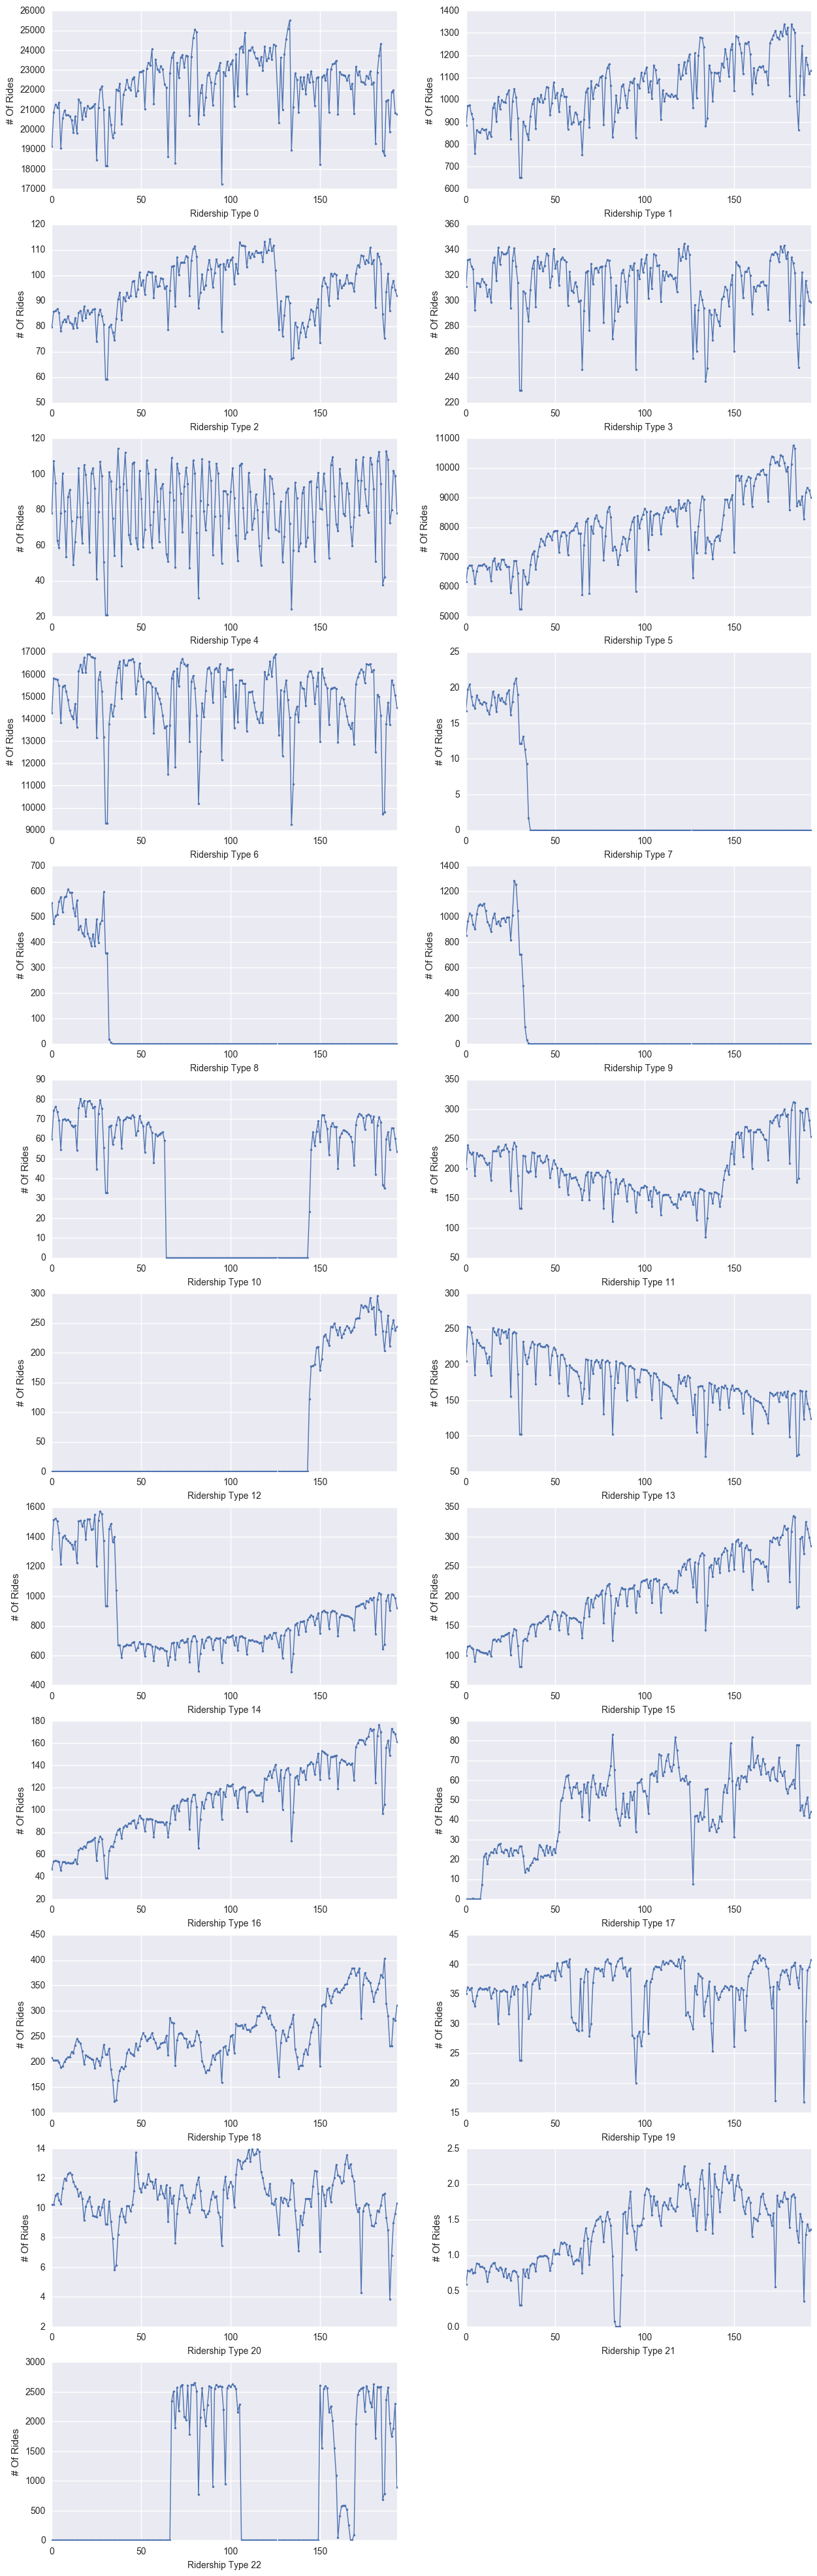

In [13]:
fig = pl.figure(figsize=(15,50))
for i in xrange(Fare.shape[1]):
    ax = fig.add_subplot(12, 2, i+1)
    ax = Ridership[i].plot(style='.-', ms=5, lw=1)
    ax.set_xlabel("Ridership Type {}".format(i), fontsize = 10)
    ax.set_ylabel("# Of Rides")
    #ax.set_title("Fig3. The Number of Rides of Ridership Type {} by Week".format(i), fontsize=15)
    #ax.legend(loc='best', fontsize=15)

### Fig above shows the the number of rides of different ridership type ( 23 types, from "0" to "22" ) by week.

### 1. Some of the plots have obvious breaks (missing values) which is not able to tell whether those time series are stationary or not, including type 7, 8, 9, 10, 12, 17, 21, 22. (8 types)

### 2. Some plots have obvious decreasing trends, including type 13 (1 type)

### 3. Some plots have obvious increasing trends, including type 1, 5, 15, 16, 18 (5 types)

### 4. Some plots are shown as stationary time series, including type 4, 6. (2 types) 

### 5. Some plots show there're structures changed, including 2, 11, 14 (3 types)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).sum()


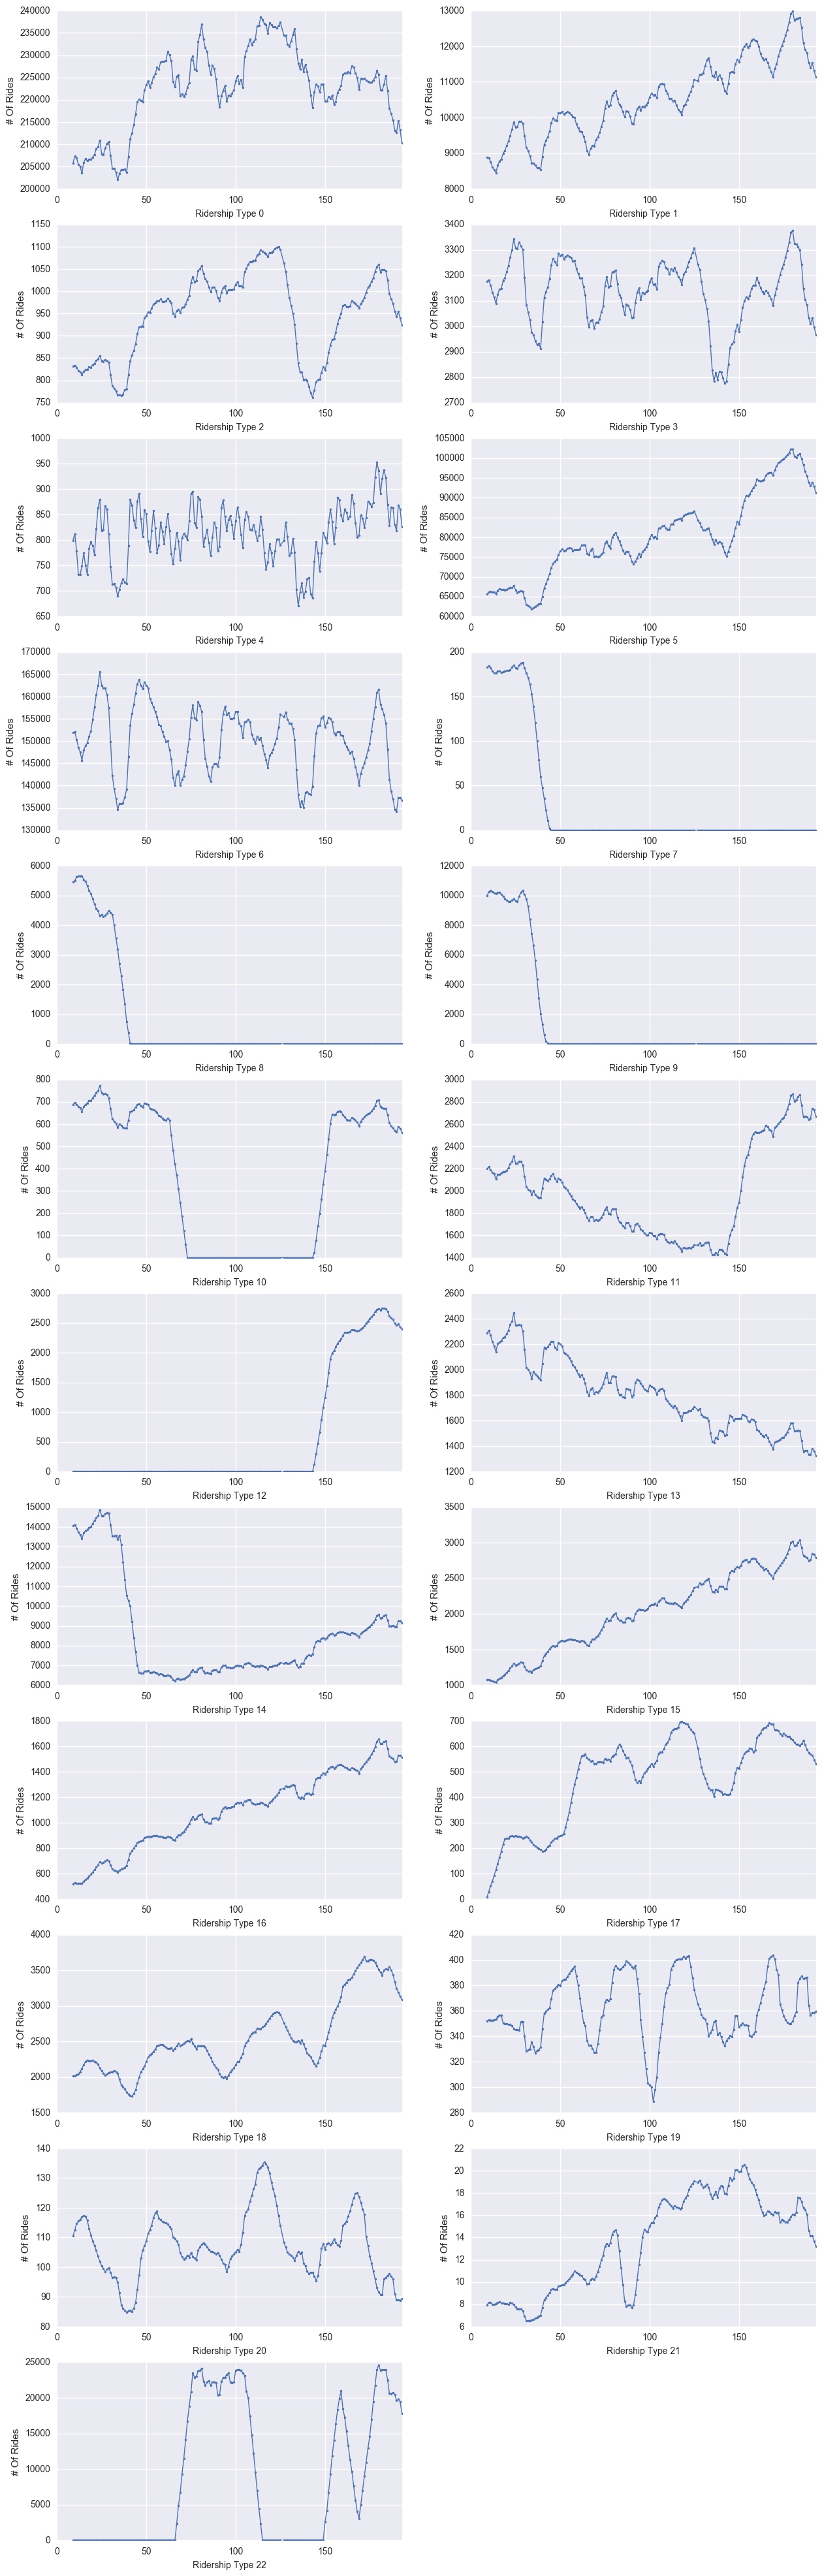

In [14]:
# Use rolling_mean to smooth the data.
fig = pl.figure(figsize=(15,50))
for i in xrange(Fare.shape[1]):
    ax = fig.add_subplot(12, 2, i+1)
    ax = pd.rolling_sum(Ridership, 10)[i].plot(style='.-', ms=5, lw=1)
    ax.set_xlabel("Ridership Type {}".format(i), fontsize = 10)
    ax.set_ylabel("# Of Rides")

In [15]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [16]:
# Type 1, 5, 13, 15, 16 and 18 are with obvious trends through plots above.
for i in [1, 5, 13, 15, 16, 18]:
    first_ten = np.nansum(Ridership[i][0:10])
    last_ten = np.nansum(Ridership[i][-10:])
    ratio = (last_ten - first_ten) / first_ten
    if ratio > 0 :
        print 'Ridership Type {} - {} : Increase {:.2f}%'.format(i, ridetype[i], ratio*100)
    elif ratio < 0:
        print 'Ridership Type {} - {} : Decrease {:.2f}%'.format(i, ridetype[i], ratio*100)


Ridership Type 1 - 14d : Increase 25.21%
Ridership Type 5 - 7d : Increase 38.97%
Ridership Type 13 - month : Decrease -42.13%
Ridership Type 15 - rr : Increase 159.30%
Ridership Type 16 - sen : Increase 190.94%
Ridership Type 18 - tcmc : Increase 53.23%


In [19]:
Ridership_diff = Ridership.diff(periods=1)
for n, i in enumerate([1, 5, 13, 15, 16, 18]): 
    if sm.tsa.stattools.adfuller(Ridership_diff[n][1:])[1] < 0.05:
        print "Ridership_diff Type {} is stationary. Thus, it changes steadily".format(ridetype[i])

Ridership_diff Type 14d is stationary. Thus, it changes steadily
Ridership_diff Type 7d is stationary. Thus, it changes steadily
Ridership_diff Type month is stationary. Thus, it changes steadily
Ridership_diff Type rr is stationary. Thus, it changes steadily
Ridership_diff Type sen is stationary. Thus, it changes steadily
Ridership_diff Type tcmc is stationary. Thus, it changes steadily


### Based on the result of ADF Test, 6 types above are steadily increase or decrease.

<br/><br/><br/>
# Alternative Method:
### First Do ADF Test to find out which types are stationary.

In [20]:
no_missing_values_type = np.delete(np.arange(23),np.array([7, 8, 9, 10, 12, 17, 21, 22]))

In [21]:
stationary_type = []
for i in no_missing_values_type: 
    if sm.tsa.stattools.adfuller(Ridership[i])[1] < 0.05:
        print "Ridership Type {} is stationary.".format(i)
        stationary_type.append(i)

Ridership Type 3 is stationary.
Ridership Type 4 is stationary.
Ridership Type 6 is stationary.
Ridership Type 19 is stationary.
Ridership Type 20 is stationary.


In [22]:
# delete types which have been already stationary.
no_missing_or_stationary_type = np.delete(no_missing_values_type, np.array(stationary_type))
print no_missing_or_stationary_type, len(no_missing_or_stationary_type)

[ 0  1  2  5 11 13 14 15 16 18 19 20] 12


<br/><br/>
### In next step, I focus on those time series which have obvious increasing/decreasing trends and find out if they steadily increase or decrease through one-order difference.  

In [23]:
Ridership_diff = Ridership.diff(periods=1)

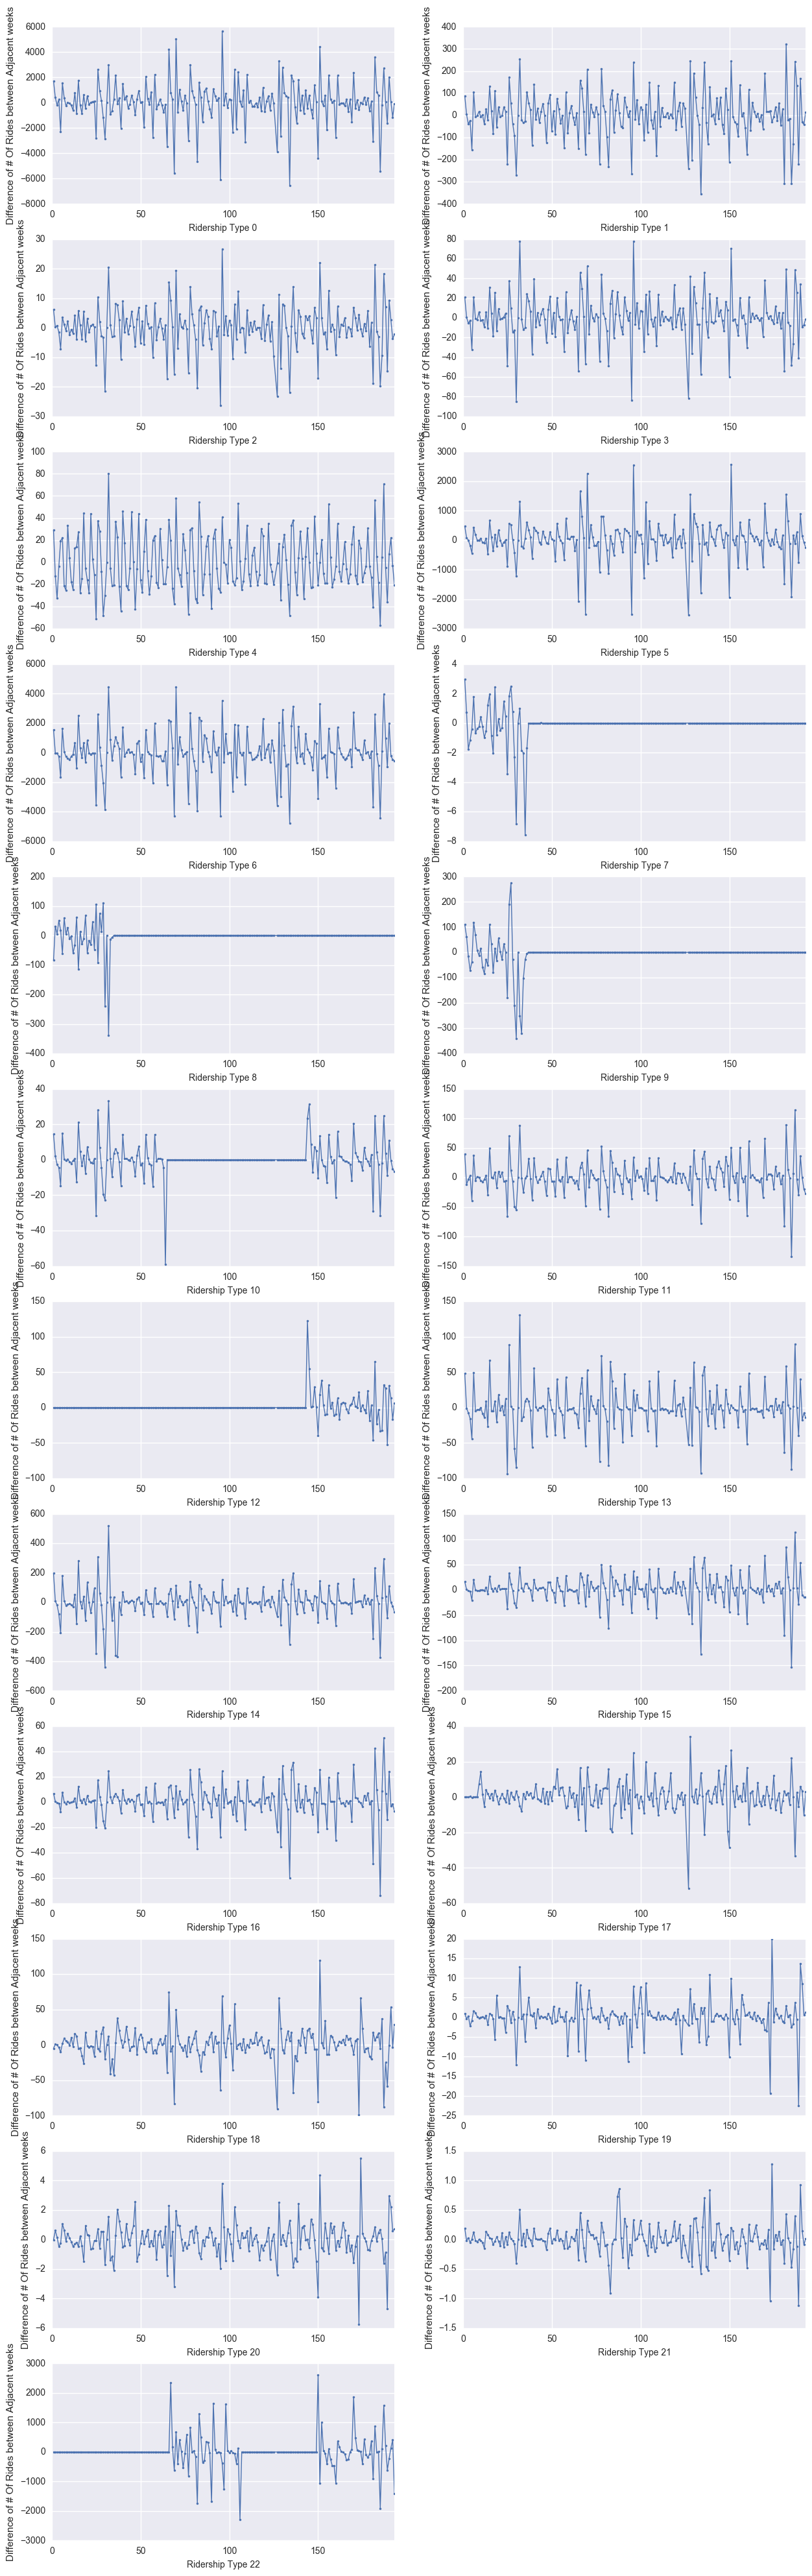

In [24]:
fig = pl.figure(figsize=(15,50))
for n, i in enumerate(range(23)): #[1,5,15,16,18,13]
    ax = fig.add_subplot(12, 2, n+1)
    ax = Ridership.diff(periods=1)[i].plot(style='.-', ms=5, lw=1)
    ax.set_xlabel("Ridership Type {}".format(i), fontsize = 10)
    ax.set_ylabel("Difference of # Of Rides between Adjacent weeks")

### Fig above shows the difference of the number Of rides between adjacent weeks in ridership type.

<br/>
### Then testify time series above are stationary or not by ADF test. (Also we can draw rolling_mean and rolling_std plot to see if they are stationary.)

In [25]:
for i in no_missing_or_stationary_type:
    if sm.tsa.stattools.adfuller(Ridership_diff[i][1:])[1] < 0.05:
        print "1-Order Diff of Ridership Type {} is stationary .".format(i)

1-Order Diff of Ridership Type 0 is stationary .
1-Order Diff of Ridership Type 1 is stationary .
1-Order Diff of Ridership Type 2 is stationary .
1-Order Diff of Ridership Type 5 is stationary .
1-Order Diff of Ridership Type 11 is stationary .
1-Order Diff of Ridership Type 13 is stationary .
1-Order Diff of Ridership Type 14 is stationary .
1-Order Diff of Ridership Type 15 is stationary .
1-Order Diff of Ridership Type 16 is stationary .
1-Order Diff of Ridership Type 18 is stationary .
1-Order Diff of Ridership Type 19 is stationary .
1-Order Diff of Ridership Type 20 is stationary .


<br/><br/>
### Then I will show the rolling_mean and rolling_std

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


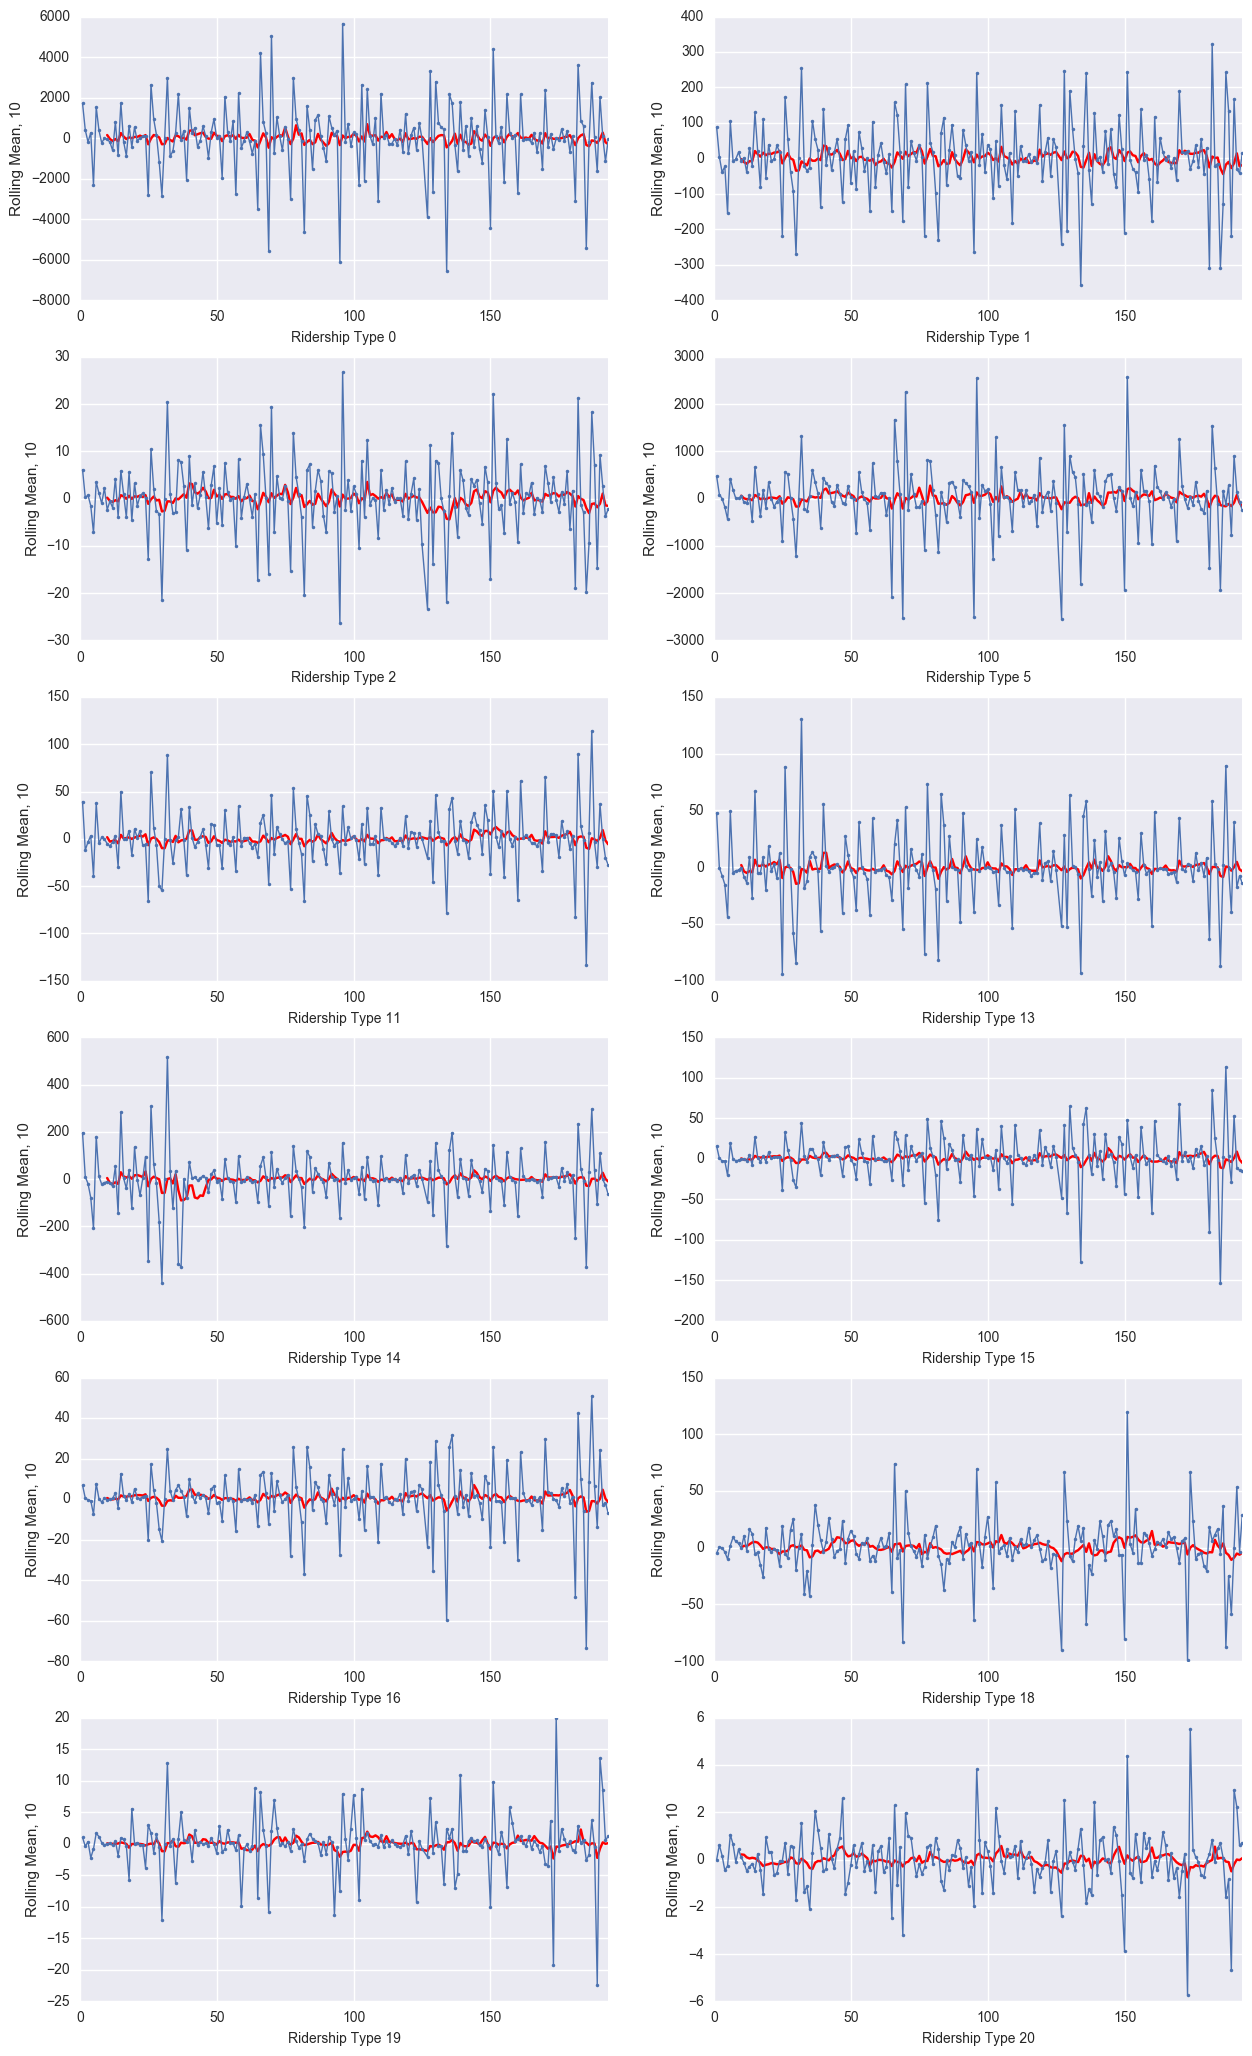

In [26]:
fig = pl.figure(figsize=(15,30))
for n, i in enumerate(no_missing_or_stationary_type): 
    ax = fig.add_subplot(7, 2, n+1)
    ax = pd.rolling_mean(Ridership_diff[i], 10).plot(fontsize=10, color='red', label="without 2015-10-22 to 2015-10-28")
    Ridership.diff(periods=1)[i].plot(style='.-', ms=5, lw=1)
    #ax = Ridership.diff(periods=1)[i].plot(style='.-', ms=5, lw=1)
    ax.set_xlabel("Ridership Type {}".format(i), fontsize = 10)
    ax.set_ylabel("Rolling Mean, 10")


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


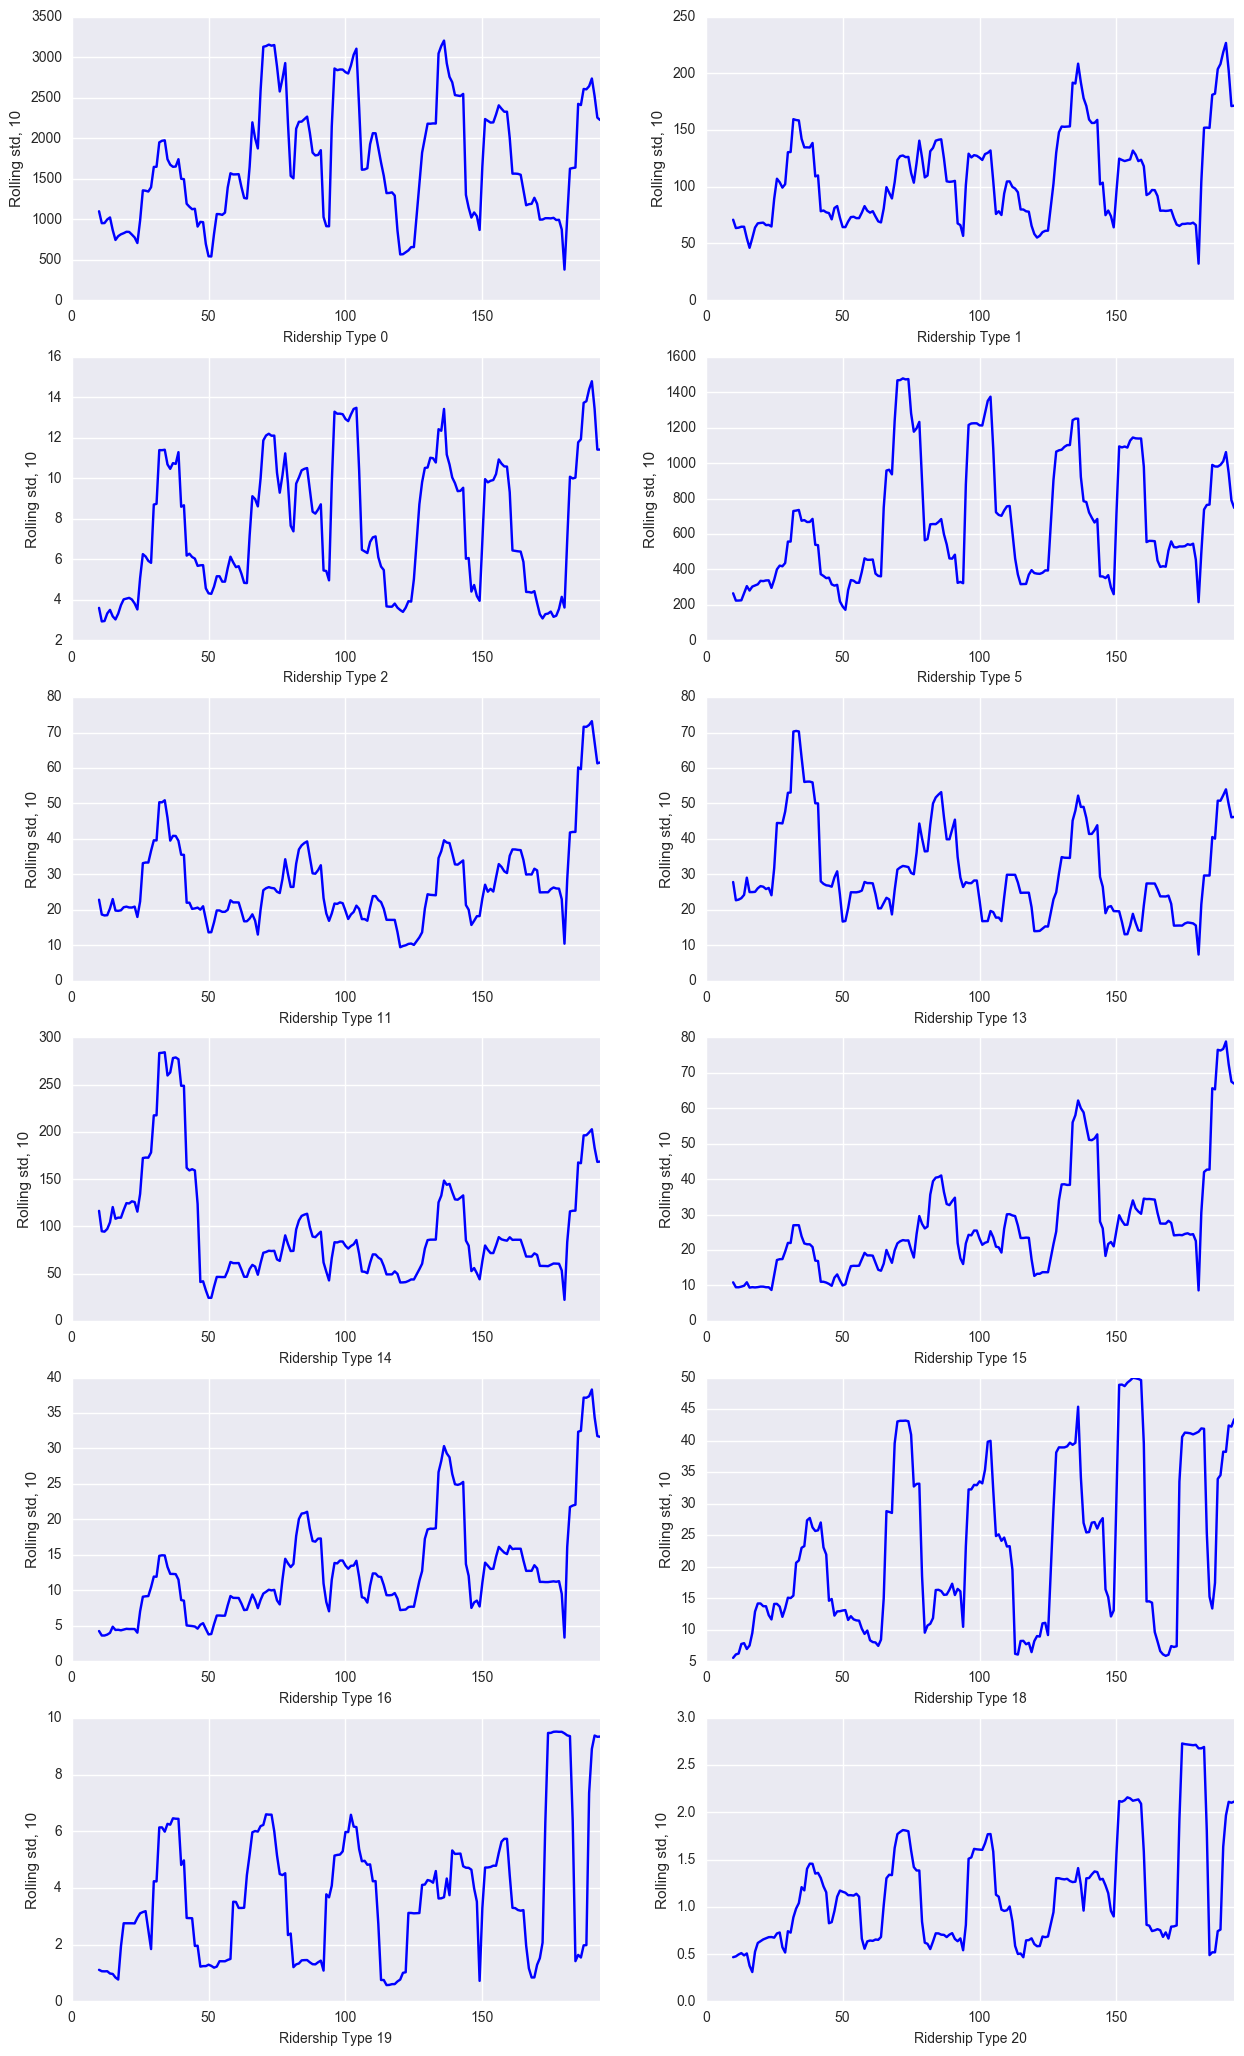

In [27]:
fig = pl.figure(figsize=(15,30))
for n, i in enumerate(no_missing_or_stationary_type): 
    ax = fig.add_subplot(7, 2, n+1)
    ax = pd.rolling_std(Ridership_diff[i], 10).plot(fontsize=10, color='blue', label="without 2015-10-22 to 2015-10-28")
    #ax = Ridership.diff(periods=1)[i].plot(style='.-', ms=5, lw=1)
    ax.set_xlabel("Ridership Type {}".format(i), fontsize = 10)
    ax.set_ylabel("Rolling std, 10")


#### Then we can conclude that which types steadily(one-order Difference is stationary) increase or decrease by observe whether their corresponding rolling mean and rolling std are constant. However, this knid of judgements are subjective, not quantatitive. 
<br/><br/><br/>

## 3

#### Here, I still delete the week when Sandy hit NYC.

In [28]:
StationPerWeek = np.nansum(Fare, axis=1)
StationPerWeek = pd.DataFrame(StationPerWeek.T)
StationPerWeek = StationPerWeek[StationPerWeek.index != 126]
N = 193

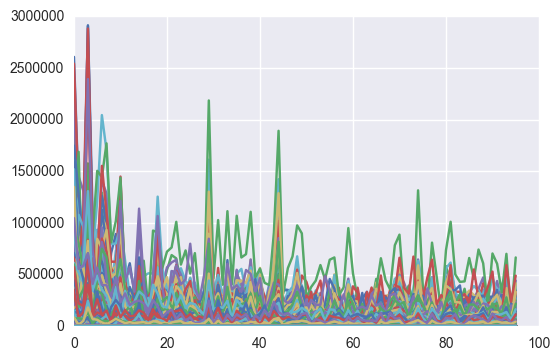

In [29]:
f = np.abs(np.fft.rfft(StationPerWeek.T))  #f->power; f.max()->peak of power for each time-series
for i in xrange(f.shape[0]):
    pl.plot(f[i][1:])

In [31]:
sta = []
power = []
for i in xrange(Fare.shape[0]):
    f = np.abs(np.fft.rfft(StationPerWeek[i]))
    periodWeek = 1/ np.fft.rfftfreq(N, 1.0)[1:][f[1:].argmax(axis=0)]
    #periodDay = periodWeek*7
    if periodWeek>45 and periodWeek<60:
        sta.append(i)
        power.append(f[1:].max())
        print 'Station {} : {:.3f} weeks, peak of power={}'.format(i, periodWeek, f[1:].max())
        

Station 0 : 48.250 weeks, peak of power=2912953.89723
Station 13 : 48.250 weeks, peak of power=819814.384176
Station 19 : 48.250 weeks, peak of power=1576281.57285
Station 32 : 48.250 weeks, peak of power=2264829.97937
Station 51 : 48.250 weeks, peak of power=196417.249029
Station 54 : 48.250 weeks, peak of power=1047735.65147
Station 78 : 48.250 weeks, peak of power=475167.413559
Station 96 : 48.250 weeks, peak of power=337901.5146
Station 129 : 48.250 weeks, peak of power=78473.117761
Station 146 : 48.250 weeks, peak of power=365251.745583
Station 150 : 48.250 weeks, peak of power=2904568.26507
Station 163 : 48.250 weeks, peak of power=1025315.54149
Station 166 : 48.250 weeks, peak of power=510718.859465
Station 171 : 48.250 weeks, peak of power=602553.35555
Station 186 : 48.250 weeks, peak of power=460666.55504
Station 194 : 48.250 weeks, peak of power=2881003.38035
Station 280 : 48.250 weeks, peak of power=387116.22586
Station 311 : 48.250 weeks, peak of power=544958.796744
Station

In [33]:
len(power)

40

In [67]:
power_top_4 = np.array(power).argsort()[-4:][::-1]
power_top_5 = np.array(power).argsort()[-5:][::-1]
power_top_6 = np.array(power).argsort()[-6:][::-1]

In [68]:
for i in power_top_6:
        print "Index:{} Station={} -> Power={}".format(i, sta[i], power[i])

Index:0 Station=0 -> Power=2912953.89723
Index:10 Station=150 -> Power=2904568.26507
Index:15 Station=194 -> Power=2881003.38035
Index:18 Station=327 -> Power=2392493.90431
Index:3 Station=32 -> Power=2264829.97937
Index:2 Station=19 -> Power=1576281.57285


In [ ]:
# f = np.abs(np.fft.rfft(StationPerWeek))
# for i in range(600):
#     pos = f[i][1:].argmax(axis=0)
#     feq = np.fft.rfftfreq(N, 1.0)[1:][pos]
#     period = 1 / feq
#     if period > 20 and period < 80:    
#         print "station {}: {} weeks".format(i, period)

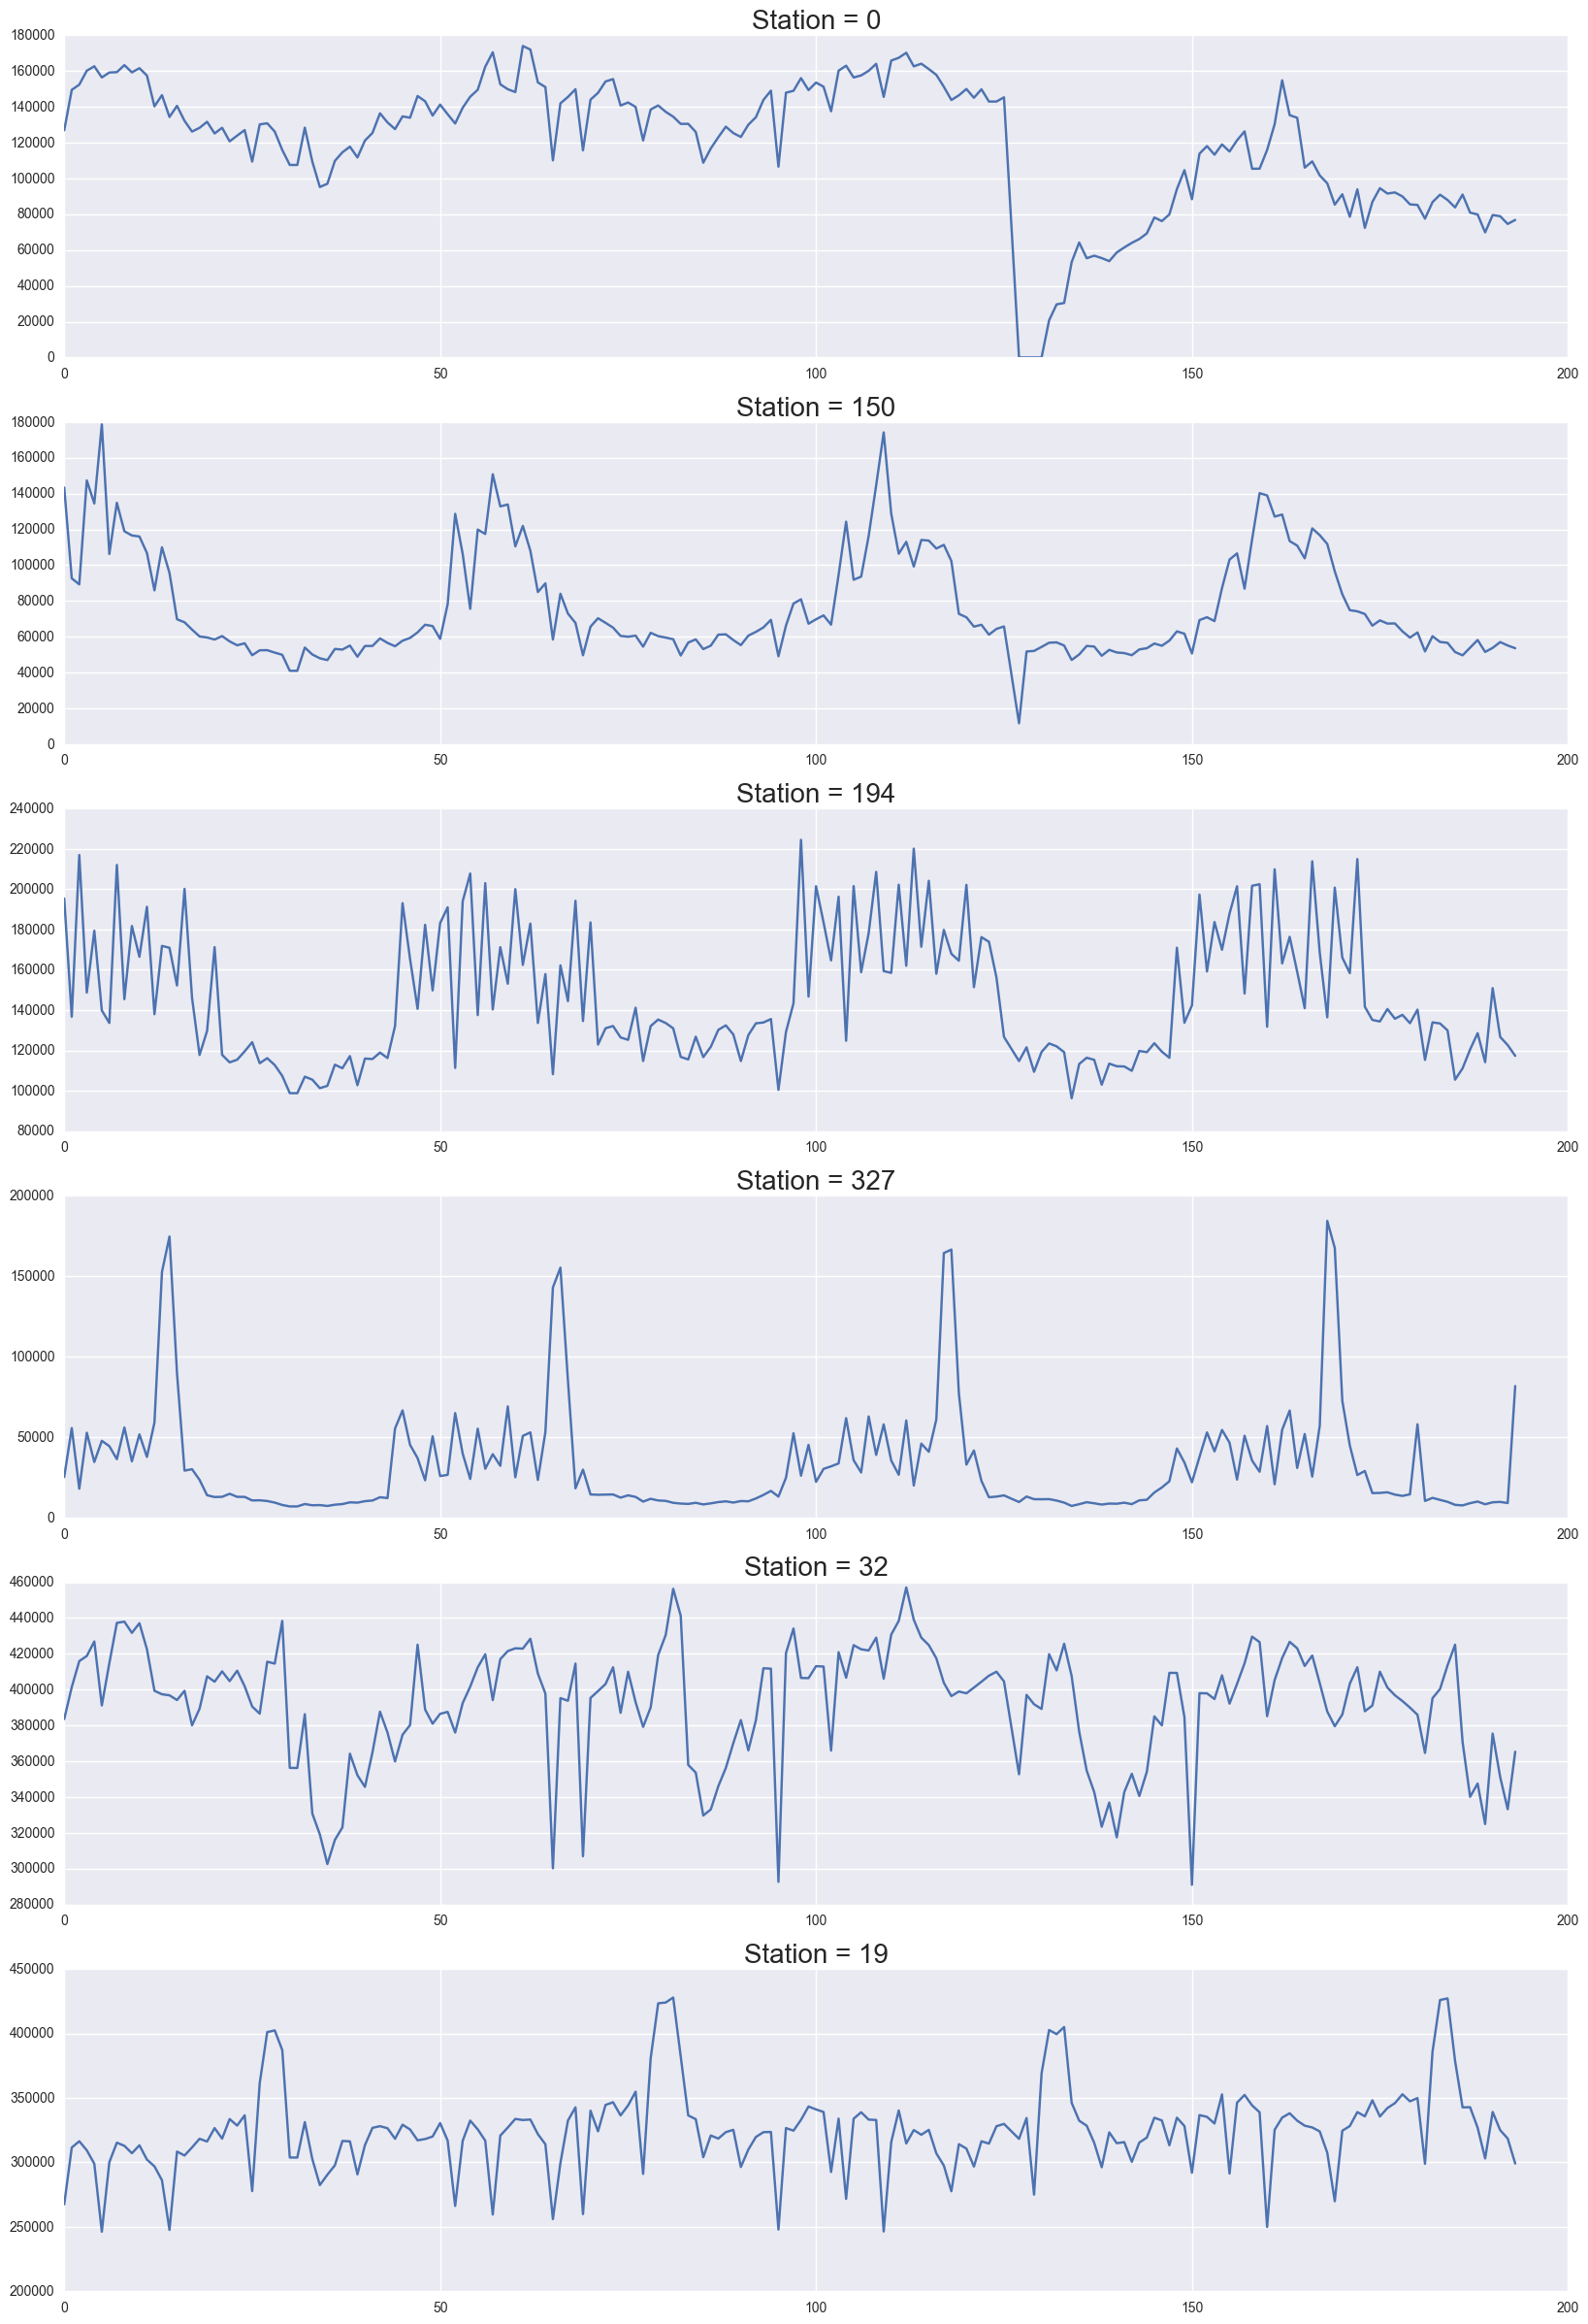

In [82]:
fig = pl.figure(figsize=(20,30))
for i, n in enumerate(power_top_6):
    ax = fig.add_subplot(611+i)
    station = sta[n]
    pl.plot(StationPerWeek[station])
    pl.title("Station = {}".format(station), fontsize=20)

### Plots above show the most obviously periodic stations (Top 6, based on the max values of each power).
### For the first plot, Station=0 are not periodic, since there's a missing value in it (around week 126 we eliminate befre). One reasonable explanation is this station was damaged by Sandy in week 126 And after the storm, this station partially operated, which means some of the infrastructure was repaired. That led to the decreas of the number of ride. However, even the number of rides decreased, the pattern (the shape) of the curve is much similar as before.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=13,center=False).sum()


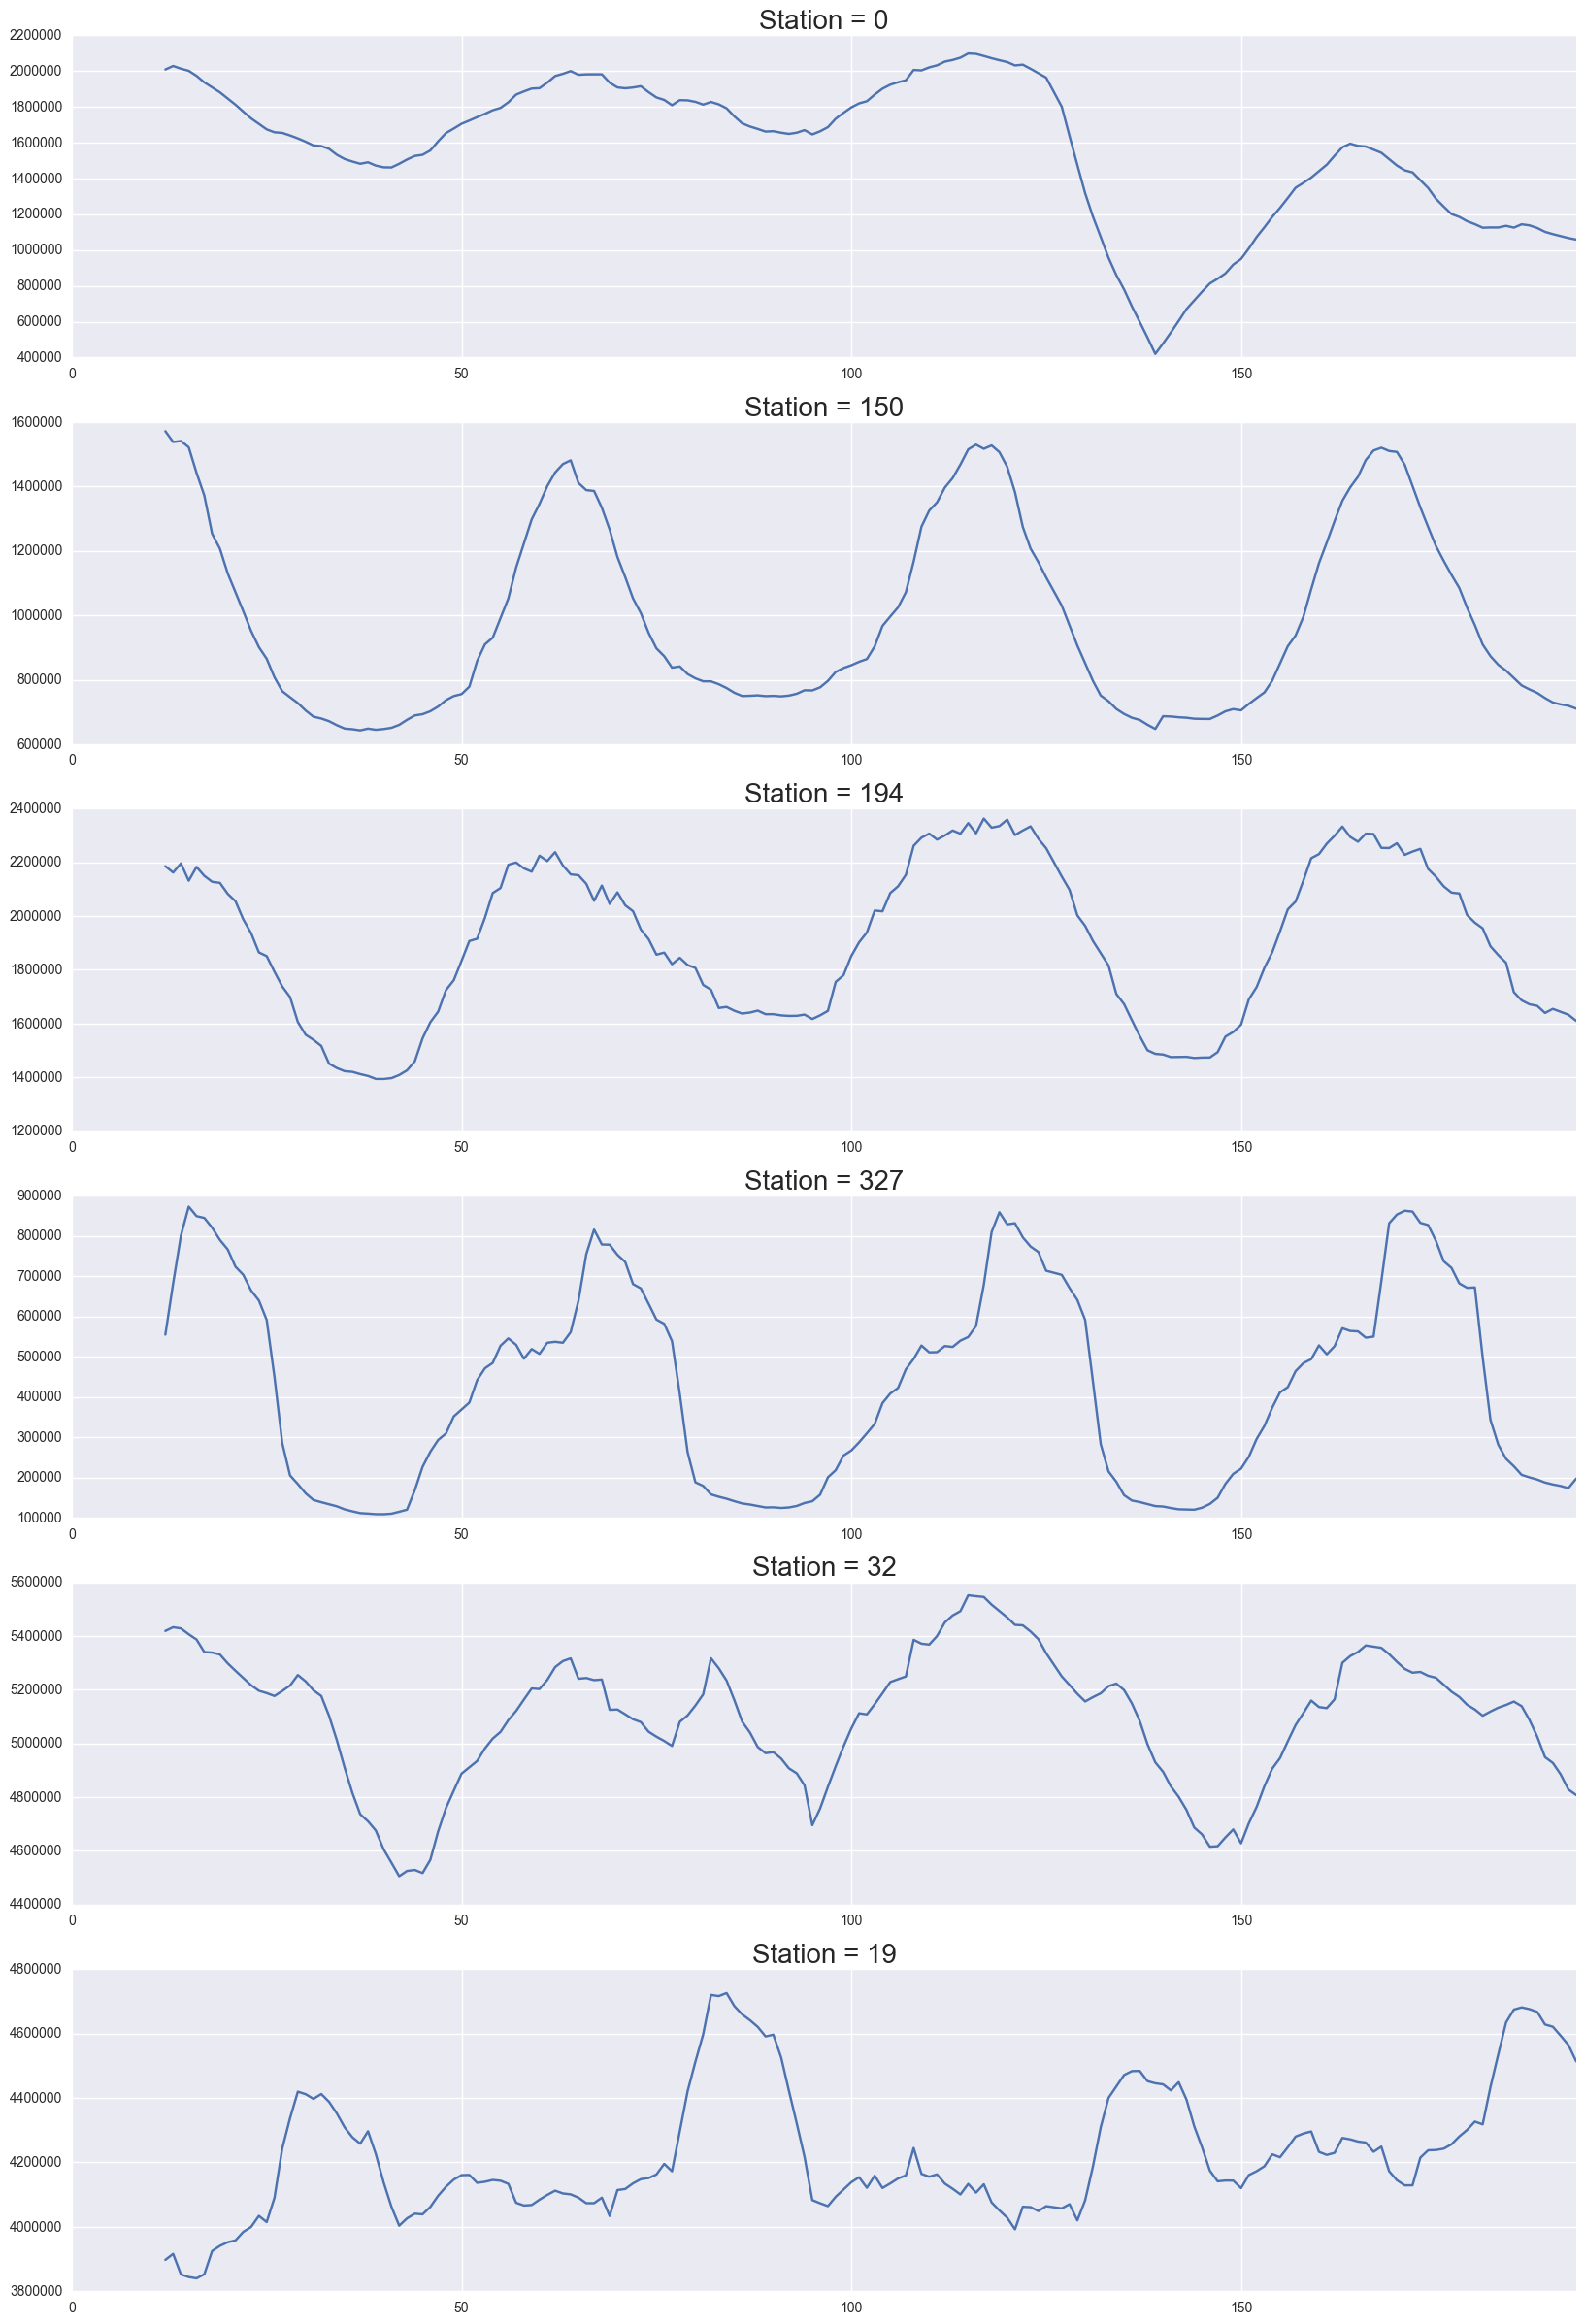

In [90]:
fig = pl.figure(figsize=(20,30))
for i, n in enumerate(power_top_6):
    ax = fig.add_subplot(611+i)
    station = sta[n]
    ax = pd.rolling_sum(StationPerWeek[station], 13).plot()
    #pl.plot(StationPerWeek[station])
    pl.title("Station = {}".format(station), fontsize=20)

### Plot above show the rolling sum (13 weeks, a quarter of a year, season )of station with most largest maximum power (Top 6). These smooth plot show more evident pattern of periodicity.

### The most prominent periodic stations (Top4) are Station 150, 194, 327, 32

<br/><br/>
### Explanation:  Why it appears periodic peaks ?
### For example: Station=150 -> period=48.25

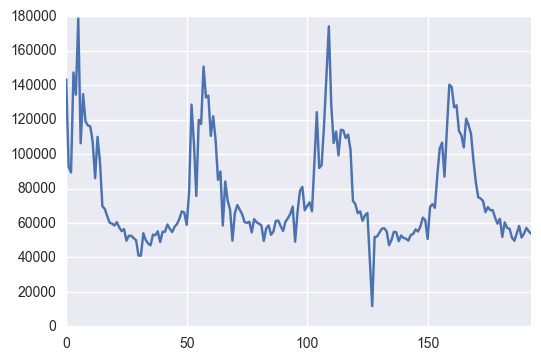

In [199]:
s150 = StationPerWeek[150]
s150.plot()

In [212]:
s150.values.argsort()[-8:][::-1]

array([  5, 109,  57,   3, 108,   0, 158, 159])

In [217]:
# 4-Period:
# 0~47
# 48~95
# 96~144 ( be careful week 126! if week>126, week=week+1 ) 
# 145~193
print "For Station{}, peak for each period is week {}, {}, {} and {}".format(150, 5, 57, 109, 158+1)

For Station150, peak for each period is week 5, 57, 109 and 159


In [221]:
RidesPerWeek[RidesPerWeek.week.isin([5, 57, 109, 159])]

rides  week   weekStart     weekEnd
5    26211666.0     5  2010-06-28  2010-07-04
57   26744295.0    57  2011-06-27  2011-07-03
109  27541198.0   109  2012-06-25  2012-07-01
159  32268526.0   159  2013-06-10  2013-06-16

### It shows pattern that annul peaks are around end of June. I think it might be related with the last day of school of spring semester.
### Maybe there's a boarding school near that station, parents and other family members always pick up their children at end of semester, which is the reason why the number of rides is high. 

<br/><br/><br/>
### Extra Credit

In [93]:
tots = Fare.transpose(2,0,1).reshape(Fare.shape[2], Fare.shape[1]*Fare.shape[0]).T

In [94]:
Fare.shape

(600, 23, 194)

In [95]:
tots.shape

(13800, 194)

In [96]:
tots = tots[tots.std(1)>0]

In [97]:
tots.shape

(7660, 194)

In [98]:
mod1 = KMeans(n_clusters=10)

In [99]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

In [100]:
vals.shape

(7660, 194)

In [103]:
res = mod1.fit_predict(vals.T)

In [104]:
res.shape

(194,)

In [105]:
res

array([7, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 7, 5, 5, 5, 7, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 9, 9, 9, 1, 1,
       9, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 9, 9, 1, 9, 1, 1, 1, 1, 9, 1,
       1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 8, 8, 9, 8, 8, 8, 8, 9, 9, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 6, 6, 6, 2, 2, 6, 6, 6, 6, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6,
       6, 2, 2, 6, 6, 2, 6, 6, 6, 2], dtype=int32)

### Above 'res' shows the label of each week through clustering and prediction

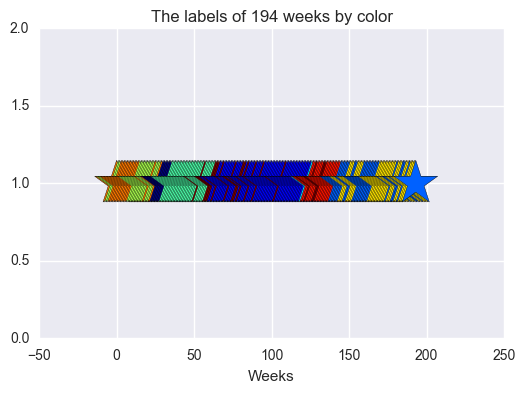

In [190]:
pl.scatter(range(194),[1]*194, c=res, marker='*', s=1100)
pl.ylim(0,2)
pl.xlabel('Weeks')
pl.title("The labels of 194 weeks by color")